In [1]:
%pip install scikit-learn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, classification_report # métrica de evaluación
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier # vecinos más cercanos para clasificación
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm  # Para la barra de progreso

Note: you may need to restart the kernel to use updated packages.


# Análisis Exploratorio

In [2]:
df_smokers = pd.read_csv('https://raw.githubusercontent.com/pokengineer/DataScience/main/datasets/smokers.csv')
df_smokers.head(5)

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,...,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,...,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,...,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,...,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,...,47,92,14.9,1,1.2,26,28,15,0,0


In [3]:
# Verificamos los tipos de datos
df_smokers.dtypes

age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)            int64
hearing(right)           int64
systolic                 int64
relaxation               int64
fasting blood sugar      int64
Cholesterol              int64
triglyceride             int64
HDL                      int64
LDL                      int64
hemoglobin             float64
Urine protein            int64
serum creatinine       float64
AST                      int64
ALT                      int64
Gtp                      int64
dental caries            int64
smoking                  int64
dtype: object

In [4]:
print("Tamaño del dataframe : {}".format(df_smokers.shape))

Tamaño del dataframe : (38984, 23)


In [5]:
# Verificamos si hay valores nulos para imputar
df_smokers.isnull().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

smoking
0    24666
1    14318
Name: count, dtype: int64


<Axes: xlabel='smoking', ylabel='count'>

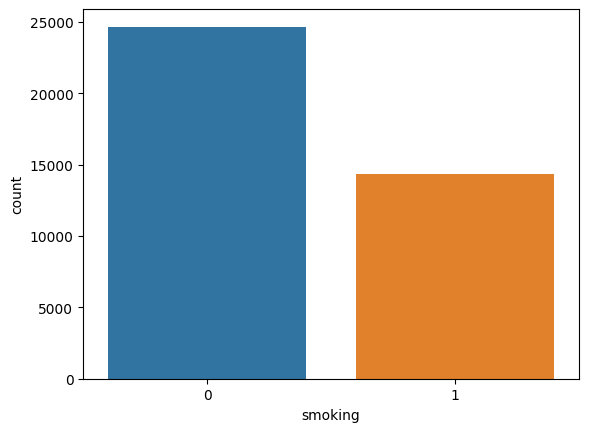

In [6]:
# Analisis de la distribución de la variable target "smoking"
print( df_smokers.smoking.value_counts() )
sns.countplot(x='smoking', data=df_smokers, hue='smoking', legend=False)

[]

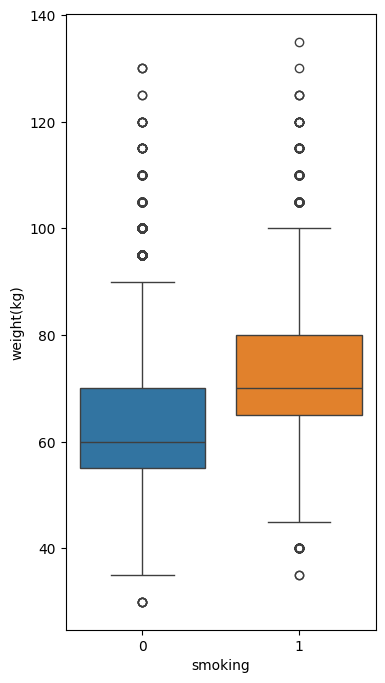

In [7]:
plt.figure(figsize=(4, 8))
s=sns.boxplot(x="smoking", y="weight(kg)", data=df_smokers, hue="smoking", legend=False)
s.plot()

# Correlación de Variables

<Axes: >

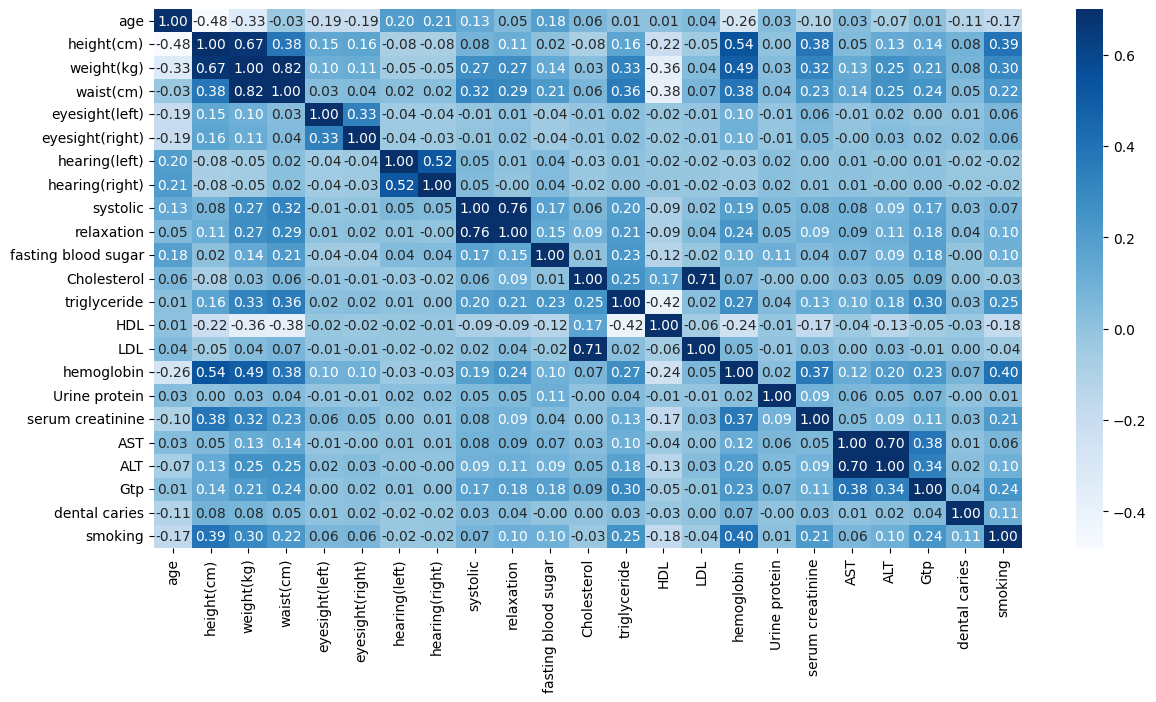

In [8]:
plt.figure(figsize=(14,7))
sns.heatmap(df_smokers.corr(), annot=True, vmax=.7, cmap ='Blues', fmt=".2f")

In [9]:
df_smokers_corr = df_smokers.corr()[["smoking"]]*100 # lo pasamos a porcentajes
df_smokers_corr = df_smokers_corr.drop("smoking", axis=0) # eliminamos la variable target
df_smokers_corr = abs(df_smokers_corr) # nos interesa el valor absouluto
df_smokers_corr = df_smokers_corr.sort_values(["smoking"], ascending=False) # ordenamos en forma descendente
#df_smokers_corr = abs(df_smokers_corr) # nos interesa el valor absouluto
df_smokers_corr

,smoking
hemoglobin,40.120561
height(cm),39.431445
weight(kg),29.934668
triglyceride,25.105661
Gtp,24.027443
waist(cm),22.335903
serum creatinine,21.247301
HDL,17.950944
age,16.626845
dental caries,10.760060


# Seleccionamos y Escalamos las variables que vamos a utilizar

Soligo: Acá Facundo con algun criterio de selección de variables que desconozco se quedó con 10 variables, ese código lo quité, usen su intuición o alguna herramienta de las vistas dentro del tiempo disponible.

In [10]:
df = df_smokers

In [11]:
# Hacemos el Split 70-30 para train-test
y_smokers = df["smoking"]
X_train, X_test, y_train, y_test = train_test_split(df.drop(["smoking"],axis = 1), y_smokers, test_size=0.3, stratify = y_smokers, random_state=42)

In [12]:
# usamos StandardScaler para escalar las variables
scaler_X = StandardScaler(with_mean=True, with_std=True)
scaler_X.fit(X_train) # entrenamos los valores quitandole la variable clase

StandardScaler()

Soligo: Atención a este código ¿Porque mejor no escalar todo antes de dividir en entrenamiento y test?

Respuesta: Porque si se escala todo antes de dividir el set de datos se estaria mezclando informacion entre el set de entrenamiento y el set de pruebas.

La media del set de entrenamiento puede ser distinta a la media del set de pruebas. Se busca que ambos set sean "independientes" entre si, el modelo no debe concoer ninguna informacion acerca del set de pruebas.

In [13]:
X_train = scaler_X.transform(X_train)
X_test = scaler_X.transform(X_test)

In [14]:
test_scores = []

# Creamos y entrenamos el algoritmo con 20 valores de K
for k in range(3,40,2):
  knn = KNeighborsClassifier(k)
  knn.fit(X_train,y_train) # Creamos y entrenamos el clasificador knn

  # Para cada valor de K, evaluamos la capacidad de clasificación con datos de prueba
  y_pred = knn.predict(X_test)
  test_scores.append(accuracy_score(y_test, y_pred)) # Agregamos los K resultados de evaluación

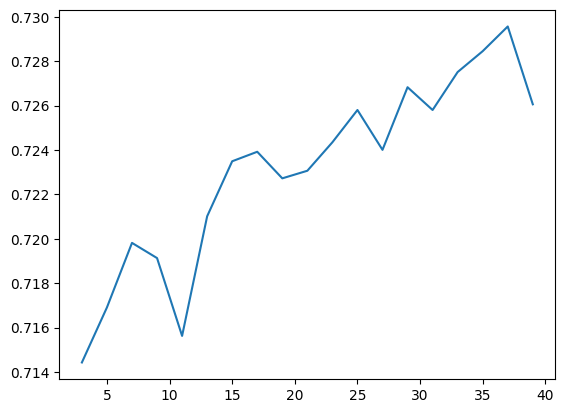

In [15]:
df_scores = pd.DataFrame([{"k":valor_k, "score":test_scores_k} for valor_k, test_scores_k in zip(range(3,40,2),test_scores)])
plt.plot(df_scores["k"], df_scores["score"])

In [16]:
df_scores

,k,score
0,3,0.714432
1,5,0.716912
2,7,0.719819
3,9,0.719135
4,11,0.715629
5,13,0.721016
6,15,0.723495
7,17,0.723923
8,19,0.722726
9,21,0.723068


In [17]:
# Entrenamos el algoritmo con el mejor K
knn = KNeighborsClassifier( 11 )
knn.fit(X_train,y_train) # Entrenamos el clasificador

KNeighborsClassifier(n_neighbors=11)

In [18]:
y_pred_knn = knn.predict(X_test)

#Exactitud del modelo
print('Exactitud (accuracy) del modelo: {:.2f} %'.format(accuracy_score(y_test, y_pred_knn)*100))
print("-"*100)

# Reporte del clasificador
print(classification_report(y_test,y_pred_knn))

Exactitud (accuracy) del modelo: 71.56 %
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      7400
           1       0.62      0.59      0.60      4296

    accuracy                           0.72     11696
   macro avg       0.69      0.69      0.69     11696
weighted avg       0.71      0.72      0.71     11696



# Ejercicio
Dado el análisis exploratorio concluimos que no hace falta imputar variables y que la variable target esta balanceada.

1 - Usando el mapa de calor de correlaciones, ¿que pares de columnas comparten más de un 0.7 de correlación?

2 - Entrenar un modelo con K menor a 11, comparar los resultados

3 - Entrenar un modelo con K mayor a 11, comparar los resultados

4 - Entrenar un modelo con 3 variables, seleccionar un K apropiado y comparar los resultados

5 - Seleccionar variables segun su intuición o usando herramientas vistas hasta ahora (Esta claro, no son muchas).

6 - "Feature Engineering", Crear una columna nueva no redundante, entrenar un modelo y comparar los resultados

## Resolución Punto 1
Usando el mapa de calor de correlaciones, ¿que pares de columnas comparten más de un 0.7 de correlación?

Matriz de correlación (Solo valores absolutos)

In [19]:
matriz_de_correlacion = df_smokers.corr().abs()

Filtramos solo los pares con correlación mayor a 0.7 (Excluimos la diagonal)

In [20]:
pares_con_correlacion_mayor = []

for i in range(len(matriz_de_correlacion.columns)):
    for j in range(i):
        if matriz_de_correlacion.iloc[i, j] >= 0.7:
            fila = matriz_de_correlacion.columns[i]
            columna = matriz_de_correlacion.columns[j]
            valor_correlacion = matriz_de_correlacion.iloc[i, j]
            pares_con_correlacion_mayor.append((fila, columna, valor_correlacion))

In [21]:
print("Pares con correlacion mayor a 0.7")
print("-" * 60)
for fila, columna, valor_correlacion in pares_con_correlacion_mayor:
    print(f"{fila:<20} {columna:<20} {valor_correlacion:12.2f}")

Pares con correlacion mayor a 0.7
------------------------------------------------------------
waist(cm)            weight(kg)                   0.82
relaxation           systolic                     0.76
LDL                  Cholesterol                  0.71


## Resolución Punto 2
Entrenar un modelo con K < 11, comparar los resultados

Creamos la instancia y asignamos los hiperparametros con K = 7

In [22]:
knn_k7 = KNeighborsClassifier(n_neighbors=7)

Ajustamos

In [23]:
knn_k7.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

Hacemos las predicciones

In [24]:
y_pred_k7 = knn_k7.predict(X_test)

Evaluamos el modelo

In [25]:
accuracy_k7 = accuracy_score(y_test, y_pred_k7)
print('Exactitud (accuracy) del modelo con K=7: {:.2f}%'.format(accuracy_k7 * 100))
print("-" * 100)
print(classification_report(y_test, y_pred_k7))

Exactitud (accuracy) del modelo con K=7: 71.98%
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      7400
           1       0.62      0.60      0.61      4296

    accuracy                           0.72     11696
   macro avg       0.70      0.69      0.70     11696
weighted avg       0.72      0.72      0.72     11696



Comparacion entre el modelo del Punto 1 con K = 11 y el modelo del Punto 2 con K = 7

In [26]:
accuracy_k11 = accuracy_score(y_test, y_pred_knn)

print("Comparación de Accuracy:")
print(f"K = 7\t{accuracy_k7:.4f}")
print(f"K = 11\t{accuracy_k11:.4f}")

if accuracy_k7 > accuracy_k11:
    print("El modelo con K = 7 fue mejor.")
elif accuracy_k7 < accuracy_k11:
    print("El modelo con K = 11 fue mejor.")
else:
    print("Ambos modelos tuvieron la misma exactitud.")

Comparación de Accuracy:
K = 7	0.7198
K = 11	0.7156
El modelo con K = 7 fue mejor.


## Resolución Punto 3
Entrenar un modelo con K > 11, comparar los resultados

Creamos la instancia y asignamos los hiperparametros con K = 39

In [27]:
knn_k39 = KNeighborsClassifier(n_neighbors=39)

Ajustamos

In [28]:
knn_k39.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=39)

Hacemos las predicciones

In [29]:
y_pred_k39 = knn_k39.predict(X_test)

Evaluamos el modelo

In [30]:
accuracy_k39 = accuracy_score(y_test, y_pred_k39)
print('Exactitud (accuracy) del modelo con K=39: {:.2f}%'.format(accuracy_k39 * 100))
print("-" * 100)
print(classification_report(y_test, y_pred_k39))

Exactitud (accuracy) del modelo con K=39: 72.61%
----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      7400
           1       0.63      0.60      0.62      4296

    accuracy                           0.73     11696
   macro avg       0.70      0.70      0.70     11696
weighted avg       0.72      0.73      0.72     11696



Comparacion entre el modelo los modelos de los puntos 1, 2 y 3 (accuracy_k7, accuracy_k11, accuracy_k39)

In [31]:
print("Comparación de Accuracy:")
print(f"K = 7\t{accuracy_k7:.4f}")
print(f"K = 11\t{accuracy_k11:.4f}")
print(f"K = 39\t{accuracy_k39:.4f}")

Comparación de Accuracy:
K = 7	0.7198
K = 11	0.7156
K = 39	0.7261


Determinamos cuál es el mejor

In [32]:
mejor_k = max([(7, accuracy_k7), (11, accuracy_k11), (39, accuracy_k39)], key=lambda x: x[1])

if (accuracy_k7 == accuracy_k11 == accuracy_k39):
    print("Los tres modelos tienen la misma exactitud.")
else:
    print(f"El modelo con K = {mejor_k[0]} fue el mejor con una exactitud de {mejor_k[1]*100:.2f}%.")

El modelo con K = 39 fue el mejor con una exactitud de 72.61%.


## Resolución Punto 4
Entrenar un modelo con 3 variables, seleccionar un K apropiado y comparar los resultados.

Elegimos las 3 variablas mas correlacionadas con el target 'smoking'.

In [33]:
top_3_variables_correlacion = df_smokers_corr.head(3).index.tolist()

Filtramos el dataset solo con estas 3 variables

In [34]:
X_reducido = df[top_3_variables_correlacion]
y = df["smoking"]

Hacemos el Split

In [35]:
X_train_reducido, X_test_reducido, y_train_reducido, y_test_reducido = train_test_split(X_reducido, y, test_size=0.3, stratify=y, random_state=42)

Escalamos

In [36]:
scaler_red = StandardScaler()
X_train_reducido = scaler_red.fit_transform(X_train_reducido)
X_test_reducido = scaler_red.transform(X_test_reducido)

Evaluamos el algoritmo unicamente con valores impares para evitar empates

In [37]:
scores_reducidos = []

for k in range(3, 40, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_reducido, y_train_reducido)
    y_pred = knn.predict(X_test_reducido)
    accuracy = accuracy_score(y_test_reducido, y_pred)
    scores_reducidos.append((k, accuracy))

for k, accuracy in scores_reducidos:
    print(f"K = {k}\tAccuracy: {accuracy:.4f}")

K = 3	Accuracy: 0.6737
K = 5	Accuracy: 0.6808
K = 7	Accuracy: 0.6791
K = 9	Accuracy: 0.6817
K = 11	Accuracy: 0.6785
K = 13	Accuracy: 0.6789
K = 15	Accuracy: 0.6804
K = 17	Accuracy: 0.6873
K = 19	Accuracy: 0.6874
K = 21	Accuracy: 0.6881
K = 23	Accuracy: 0.6895
K = 25	Accuracy: 0.6890
K = 27	Accuracy: 0.6896
K = 29	Accuracy: 0.6906
K = 31	Accuracy: 0.6935
K = 33	Accuracy: 0.6923
K = 35	Accuracy: 0.6931
K = 37	Accuracy: 0.6907
K = 39	Accuracy: 0.6904


Obtenemos el mejor K y su score y lo entrenamos

In [38]:
mejor_k_reducido, mejor_acc_reducido = max(scores_reducidos, key=lambda x: x[1])
print(f"Mejor K con 3 variables: {mejor_k_reducido}\tAccuracy: {mejor_acc_reducido:.4f}")

Mejor K con 3 variables: 31	Accuracy: 0.6935


Creamos la instancia

In [39]:
knn_reducido = KNeighborsClassifier(n_neighbors=mejor_k_reducido)

Ajustamos

In [40]:
knn_reducido.fit(X_train_reducido, y_train_reducido)

KNeighborsClassifier(n_neighbors=31)

Hacemos las predicciones

In [41]:
y_pred_reducido = knn_reducido.predict(X_test_reducido)
accuracy_reducido = accuracy_score(y_test_reducido, y_pred_reducido)

Comparación de accuracy entre modelo completo y modelo reducido (3 variables)

In [42]:
print("K's con el modelo completo")
print(f"K =  7\tAccuracy: {accuracy_k7:.4f}")
print(f"K = 11\tAccuracy: {accuracy_k11:.4f}")
print(f"K = 39\tAccuracy: {accuracy_k39:.4f}")
print("\nMejor K con el modelo reducido")
print(f"K = {mejor_k_reducido:>2}\tAccuracy: {accuracy_reducido:.4f}\n")

mejor_acc_full = max(accuracy_k7, accuracy_k11, accuracy_k39)
if accuracy_reducido > mejor_acc_full:
    print("El modelo reducido con 3 variables fue el mejor.")
else:
    print("El modelo con todas las variables fue más preciso.")

K's con el modelo completo
K =  7	Accuracy: 0.7198
K = 11	Accuracy: 0.7156
K = 39	Accuracy: 0.7261

Mejor K con el modelo reducido
K = 31	Accuracy: 0.6935

El modelo con todas las variables fue más preciso.


## Resolución Punto 5
Seleccionar variables segun su intuición o usando herramientas vistas hasta ahora (Esta claro, no son muchas).

### Primer intento
Seleccionamos 8 variables por intuicion

In [43]:
variables_intuicion = ['age', 'waist(cm)', 'relaxation', 'fasting blood sugar', 'HDL', 'LDL', 'Gtp', 'hemoglobin']

Creamos un nuevo dataframe con solo las 8 variables seleccionadas (Añadimos 'smoking' para la variable target)

In [44]:
df_reducido_por_intuicion = df_smokers[variables_intuicion + ['smoking']]
y_smokers_intuicion = df_reducido_por_intuicion['smoking']

Hacemos el Split 70-30 para train-test

In [45]:
X_train_intuicion, X_test_intuicion, y_train_intuicion, y_test_intuicion = train_test_split(
    df_reducido_por_intuicion.drop(['smoking'], axis=1),
    y_smokers_intuicion,
    test_size=0.3,
    stratify=y_smokers_intuicion,
    random_state=42
)

Escalamos las variables con StandardScaler

In [46]:
scaler_X_intuicion = StandardScaler()

Entrenamos el scaler en los datos de entrenamiento

In [47]:
scaler_X_intuicion.fit(X_train_intuicion)
X_train_intuicion = scaler_X_intuicion.transform(X_train_intuicion)
X_test_intuicion = scaler_X_intuicion.transform(X_test_intuicion)

Probamos el modelo con diferentes valores de K

In [48]:
scores_intuicion = []

for k in range(3, 40, 2):
    knn_intuicion = KNeighborsClassifier(n_neighbors=k)
    knn_intuicion.fit(X_train_intuicion, y_train_intuicion)
    y_pred_intuicion = knn_intuicion.predict(X_test_intuicion)
    accuracy = accuracy_score(y_test_intuicion, y_pred_intuicion)
    scores_intuicion.append((k, accuracy))

Encontramos el mejor valor de K

In [49]:
mejor_k_intuicion, mejor_acc_intuicion = max(scores_intuicion, key=lambda x: x[1])
print(f"Mejor K con las 8 variables: {mejor_k_intuicion}\tAccuracy: {mejor_acc_intuicion:.4f}")

Mejor K con las 8 variables: 19	Accuracy: 0.7169


Entrenamos el modelo con el mejor K

In [50]:
knn_intuicion = KNeighborsClassifier(n_neighbors=mejor_k_intuicion)
knn_intuicion.fit(X_train_intuicion, y_train_intuicion)

KNeighborsClassifier(n_neighbors=19)

Predicción y evaluación

In [51]:
y_pred_intuicion = knn_intuicion.predict(X_test_intuicion)
accuracy_intuicion = accuracy_score(y_test_intuicion, y_pred_intuicion)
print(f"Exactitud del modelo con las 8 variables: {accuracy_intuicion * 100:.2f} %")
print(classification_report(y_test_intuicion, y_pred_intuicion))

Exactitud del modelo con las 8 variables: 71.69 %
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      7400
           1       0.62      0.58      0.60      4296

    accuracy                           0.72     11696
   macro avg       0.69      0.69      0.69     11696
weighted avg       0.71      0.72      0.71     11696



In [52]:
df_reducido_por_intuicion = df_reducido_por_intuicion.corr()[["smoking"]]*100 # lo pasamos a porcentajes
df_reducido_por_intuicion = df_reducido_por_intuicion.drop("smoking", axis=0) # eliminamos la variable target
df_reducido_por_intuicion = abs(df_reducido_por_intuicion) # nos interesa el valor absouluto
df_reducido_por_intuicion = df_reducido_por_intuicion.sort_values(["smoking"], ascending=False) # ordenamos en forma descendente
df_reducido_por_intuicion

,smoking
hemoglobin,40.120561
Gtp,24.027443
waist(cm),22.335903
HDL,17.950944
age,16.626845
relaxation,10.366297
fasting blood sugar,9.990846
LDL,4.162746


### Segundo intento
Sacamos la variable de menos correlacion cada ietracion. Partimos desde las 10 variables con mas correalcion con la variable target. Filtramos las variables con Multicolinealidad

Paso 1: Seleccionar variables numéricas (excepto la target)

In [53]:
numerical_cols = df_smokers.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('smoking')

Paso 2: Calcular correlación con 'smoking'

In [54]:
corr_with_target = df_smokers[numerical_cols + ['smoking']].corr()['smoking'].drop('smoking')
corr_abs_sorted = corr_with_target.abs().sort_values(ascending=False)
ranked_vars = list(corr_abs_sorted.index)

Paso 3: Filtrar multicolinealidad entre las top variables

In [55]:
def eliminar_multicolinealidad(vars_ordenadas, corr_matrix, target_corr, umbral=0.7, n=10):
    seleccionadas = []
    i = 0
    while len(seleccionadas) < n and i < len(vars_ordenadas):
        var_actual = vars_ordenadas[i]
        es_colineal = False
        for var_sel in seleccionadas:
            if abs(corr_matrix.loc[var_actual, var_sel]) > umbral:
                # Si hay colinealidad, nos quedamos con la más correlacionada con 'smoking'
                if abs(target_corr[var_actual]) < abs(target_corr[var_sel]):
                    es_colineal = True
                    break
                else:
                    seleccionadas.remove(var_sel)
                    break
        if not es_colineal:
            seleccionadas.append(var_actual)
        i += 1
    return seleccionadas

Crear matriz de correlación entre variables

In [56]:
corr_matrix = df_smokers[ranked_vars].corr()

Filtrar las 10 variables evitando multicolinealidad

In [57]:
final_vars = eliminar_multicolinealidad(ranked_vars, corr_matrix, corr_with_target, umbral=0.7, n=10)

print("Variables seleccionadas sin multicolinealidad:")
print(final_vars)

Variables seleccionadas sin multicolinealidad:
['hemoglobin', 'height(cm)', 'weight(kg)', 'triglyceride', 'Gtp', 'serum creatinine', 'HDL', 'age', 'dental caries', 'relaxation']


Paso 4: Evaluación iterativa eliminando una a una (de menor correlación)

Ordenamos las variables seleccionadas según su correlación con 'smoking'

In [58]:
results = []

final_vars_sorted = sorted(final_vars, key=lambda x: abs(corr_with_target[x]), reverse=True)

for i in range(len(final_vars_sorted), 1, -1):
    current_vars = final_vars_sorted[:i]

    df_current = df_smokers[current_vars + ['smoking']]
    X = df_current.drop('smoking', axis=1)
    y = df_current['smoking']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    knn = KNeighborsClassifier(n_neighbors=37)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)

    results.append((i, current_vars.copy(), acc))

Paso 5: Mostrar resultados

In [59]:
print("\nResultados de accuracy eliminando una variable a la vez:")
for num_vars, vars_used, acc in results:
    print(f"{num_vars} variables: Accuracy = {acc:.4f} → Variables: {vars_used}")


Resultados de accuracy eliminando una variable a la vez:
10 variables: Accuracy = 0.7303 → Variables: ['hemoglobin', 'height(cm)', 'weight(kg)', 'triglyceride', 'Gtp', 'serum creatinine', 'HDL', 'age', 'dental caries', 'relaxation']
9 variables: Accuracy = 0.7320 → Variables: ['hemoglobin', 'height(cm)', 'weight(kg)', 'triglyceride', 'Gtp', 'serum creatinine', 'HDL', 'age', 'dental caries']
8 variables: Accuracy = 0.7358 → Variables: ['hemoglobin', 'height(cm)', 'weight(kg)', 'triglyceride', 'Gtp', 'serum creatinine', 'HDL', 'age']
7 variables: Accuracy = 0.7307 → Variables: ['hemoglobin', 'height(cm)', 'weight(kg)', 'triglyceride', 'Gtp', 'serum creatinine', 'HDL']
6 variables: Accuracy = 0.7220 → Variables: ['hemoglobin', 'height(cm)', 'weight(kg)', 'triglyceride', 'Gtp', 'serum creatinine']
5 variables: Accuracy = 0.7255 → Variables: ['hemoglobin', 'height(cm)', 'weight(kg)', 'triglyceride', 'Gtp']
4 variables: Accuracy = 0.7065 → Variables: ['hemoglobin', 'height(cm)', 'weight(kg)

Los mejores resultados se obtuvieron con 10 y 7 variables

### Tercer intento

Aplicamos cross validation

Paso 4: Definir las combinaciones de variables

In [60]:
vars_10 = ['hemoglobin', 'height(cm)', 'weight(kg)', 'triglyceride', 'Gtp',
           'serum creatinine', 'HDL', 'health_index', 'age', 'dental caries']
vars_7 = ['hemoglobin', 'height(cm)', 'weight(kg)', 'triglyceride', 'Gtp',
          'serum creatinine', 'HDL']

Función para validación cruzada y búsqueda del mejor k

In [61]:
def cross_val_best_k(X, y, k_range=range(3, 40, 2), folds=5):
    best_k = None
    best_acc = 0
    kf = KFold(n_splits=folds, shuffle=True, random_state=42)

    # Barra de progreso para los valores de k
    for k in tqdm(k_range, desc="Buscando mejor K", ncols=100):
        fold_acc = []
        # Barra de progreso para los pliegues
        for train_idx, test_idx in tqdm(kf.split(X), desc=f'Validando k={k}', leave=False, ncols=100):
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            knn = KNeighborsClassifier(n_neighbors=k)
            knn.fit(X_train_scaled, y_train)
            y_pred = knn.predict(X_test_scaled)
            acc = accuracy_score(y_test, y_pred)
            fold_acc.append(acc)

        avg_acc = np.mean(fold_acc)

        if avg_acc > best_acc:
            best_acc = avg_acc
            best_k = k

    return best_k, best_acc

Paso 5: Evaluar los dos casos (10 y 7 variables) con validación cruzada y búsqueda de k

In [62]:
X_10 = df_smokers[vars_10].values
y_10 = df_smokers['smoking'].values
X_7 = df_smokers[vars_7].values
y_7 = df_smokers['smoking'].values

best_k_10, best_acc_10 = cross_val_best_k(X_10, y_10)
best_k_7, best_acc_7 = cross_val_best_k(X_7, y_7)

KeyError: "['health_index'] not in index"

Paso 6: Imprimir los resultados

In [ ]:
print(f"Mejor K para 10 variables: {best_k_10} → Accuracy: {best_acc_10:.4f}")
print(f"Mejor K para 7 variables: {best_k_7} → Accuracy: {best_acc_7:.4f}")

Mostrar cuál es la mejor combinación

In [ ]:
if best_acc_10 > best_acc_7:
    print("\nLa mejor combinación es con 10 variables.")
    print(f"Mejor K: {best_k_10}, Accuracy: {best_acc_10:.4f}")
else:
    print("\nLa mejor combinación es con 7 variables.")
    print(f"Mejor K: {best_k_7}, Accuracy: {best_acc_7:.4f}")

Usando cross validation tuvimos peores resultados

### Cuarto intento

In [ ]:
def buscar_mejor_k(X, y, k_range=range(1, 41,2)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    mejor_k = None
    mejor_acc = 0
    resultados = []

    for k in tqdm(k_range, desc="Buscando mejor k"):
        modelo = KNeighborsClassifier(n_neighbors=k)
        modelo.fit(X_train_scaled, y_train)
        y_pred = modelo.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)
        resultados.append((k, acc))

        if acc > mejor_acc:
            mejor_acc = acc
            mejor_k = k

    return mejor_k, mejor_acc, resultados

Ejecutar búsqueda

In [ ]:
X_10 = df_smokers[vars_10].values
y_10 = df_smokers['smoking'].values
mejor_k_10, mejor_acc_10, resultados_10 = buscar_mejor_k(X_10, y_10)

X_7 = df_smokers[vars_7].values
y_7 = df_smokers['smoking'].values
mejor_k_7, mejor_acc_7, resultados_7 = buscar_mejor_k(X_7, y_7)

Mostrar resultados

In [ ]:
print(f"Mejor K para 10 variables: {mejor_k_10} → Accuracy: {mejor_acc_10:.4f}")
print(f"Mejor K para 7 variables: {mejor_k_7} → Accuracy: {mejor_acc_7:.4f}")

if mejor_acc_10 > mejor_acc_7:
    print("\nLa mejor combinación es con 10 variables.")
else:
    print("\nLa mejor combinación es con 7 variables.")

Crear DataFrames de resultados

In [ ]:
df_scores_10 = pd.DataFrame(resultados_10, columns=["k", "accuracy"])
df_scores_7 = pd.DataFrame(resultados_7, columns=["k", "accuracy"])

Plotear los resultados

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df_scores_10["k"], df_scores_10["accuracy"], label="10 variables", marker='o')
plt.plot(df_scores_7["k"], df_scores_7["accuracy"], label="7 variables", marker='s')
plt.xlabel("Valor de k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k para 7 y 10 variables")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Aunque k = 1 da la mejor acuracy, no conviene utilizarla. Vamos a trabajar con k=37

Tasmbien podemos sacar la conclusion que el modelo con 10 varibles es mejor

## Resolución Punto 6
"Feature Engineering", Crear una columna nueva no redundante, entrenar un modelo y comparar los resultados

Crear una nueva columna "health_index" basada en la fórmula anterior

In [ ]:
df_smokers["health_index"] = (df_smokers["waist(cm)"] + df_smokers["systolic"]) / (df_smokers["HDL"] + df_smokers["LDL"])

Ver los primeros valores de la nueva columna

In [ ]:
df_smokers[["waist(cm)", "systolic", "HDL", "LDL", "health_index"]].head()

Vamos a hacer el Split de datos de nuevo, incluyendo esta nueva columna

In [ ]:
selected_vars_with_new = ['age', 'waist(cm)', 'systolic', 'relaxation', 'fasting blood sugar',
                          'Cholesterol', 'HDL', 'LDL', 'Gtp', 'hemoglobin', 'health_index']

Creamos un nuevo dataframe con las variables seleccionadas y la nueva columna

In [ ]:
df_selected_with_new = df_smokers[selected_vars_with_new + ['smoking']]  # Añadimos 'smoking' para la variable target

Hacemos el Split 70-30 para train-test

In [ ]:
y_smokers_selected_new = df_selected_with_new["smoking"]
X_train_selected_new, X_test_selected_new, y_train_selected_new, y_test_selected_new = train_test_split(
    df_selected_with_new.drop(["smoking"], axis=1), y_smokers_selected_new, test_size=0.3, stratify=y_smokers_selected_new, random_state=42
)

Escalamos las variables con StandardScaler

In [ ]:
scaler_X_selected_new = StandardScaler()
scaler_X_selected_new.fit(X_train_selected_new)  # Entrenamos el scaler en los datos de entrenamiento
X_train_selected_new = scaler_X_selected_new.transform(X_train_selected_new)
X_test_selected_new = scaler_X_selected_new.transform(X_test_selected_new)

Probamos el modelo con diferentes valores de K (por ejemplo, de 3 a 39)

In [ ]:
scores_selected_new = []
for k in range(3, 40, 2):
    knn_selected_new = KNeighborsClassifier(n_neighbors=k)
    knn_selected_new.fit(X_train_selected_new, y_train_selected_new)
    y_pred_selected_new = knn_selected_new.predict(X_test_selected_new)
    acc = accuracy_score(y_test_selected_new, y_pred_selected_new)
    scores_selected_new.append((k, acc))

Encontramos el mejor valor de K con la nueva columna

In [ ]:
mejor_k_selected_new, mejor_acc_selected_new = max(scores_selected_new, key=lambda x: x[1])
print(f"Mejor K con la nueva variable (health_index): {mejor_k_selected_new} → Accuracy: {mejor_acc_selected_new:.4f}")

Entrenamos el modelo con el mejor K

In [ ]:
knn_selected_new = KNeighborsClassifier(n_neighbors=mejor_k_selected_new)
knn_selected_new.fit(X_train_selected_new, y_train_selected_new)

Predicción y evaluación

In [ ]:
y_pred_selected_new = knn_selected_new.predict(X_test_selected_new)
accuracy_selected_new = accuracy_score(y_test_selected_new, y_pred_selected_new)
print(f"Exactitud del modelo con la nueva variable: {accuracy_selected_new * 100:.2f} %")
print(classification_report(y_test_selected_new, y_pred_selected_new))

Comparación de accuracy entre modelos anteriores y modelo con nueva variable

In [ ]:
print("\nComparación de accuracy entre modelos anteriores y modelo con nueva variable (health_index):\n")
print(f"K = 7 (full vars) - Accuracy: {accuracy_k7:.4f}")
print(f"K = 11 (full vars) - Accuracy: {accuracy_k11:.4f}")
print(f"K = 39 (full vars) - Accuracy: {accuracy_k39:.4f}")
print(f"K = {mejor_k_selected_new:>2} (10 vars + health_index) - Accuracy: {accuracy_selected_new:.4f}")

Conclusión

In [ ]:
mejor_acc_full = max(accuracy_k7, accuracy_k11, accuracy_k39)
if accuracy_selected_new > mejor_acc_full:
    print("El modelo con la nueva variable 'health_index' fue el mejor.")
else:
    print("El modelo con todas las variables fue más preciso.")

### Version 2

Cargar los datos

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/pokengineer/DataScience/main/datasets/smokers.csv')

Variables seleccionadas (mejor resultado punto 5)

In [ ]:
features_base = ['hemoglobin', 'height(cm)', 'weight(kg)', 'triglyceride', 'Gtp',
           'serum creatinine', 'HDL', 'health_index', 'age', 'dental caries']

Crear nuevas variables (feature engineering)

In [ ]:
df["waist_age_ratio"] = df["waist(cm)"] / (df["age"] + 1)
df["pressure_diff"] = df["systolic"] - df["relaxation"]
df["chol_ldl_ratio"] = df["LDL"] / (df["fasting blood sugar"] + 1)
df["gtp_ldl_ratio"] = df["Gtp"] / (df["LDL"] + 1)
df["metabolic_index"] = (df["triglyceride"] + df["LDL"] + df["fasting blood sugar"]) / (df["hemoglobin"] + 1)

Variables finales para el modelo

In [ ]:
feature_cols = features_base + ["waist_age_ratio", "pressure_diff", "chol_ldl_ratio", "gtp_ldl_ratio", "metabolic_index"]

Eliminamos outliers extremos de las nuevas variables (usando IQR)

In [ ]:
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

df = remove_outliers_iqr(df, ["waist_age_ratio", "pressure_diff", "chol_ldl_ratio", "gtp_ldl_ratio", "metabolic_index"])

Separar features y target

In [ ]:
X = df[feature_cols]
y = df["smoking"]

Dividimos el dataset (70% train, 30% test) con estratificación

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Estandarizamos los datos

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Buscamos el mejor K (de 3 a 39 impares)

In [ ]:
best_k = None
best_acc = 0

print("Buscando el mejor K:")
for k in range(3, 80, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"K = {k} → Accuracy = {acc:.4f}")
    if acc > best_acc:
        best_acc = acc
        best_k = k

Entrenamos modelo final con mejor K

In [ ]:
print("\n" + "=" * 50)
print(f"Mejor K: {best_k} → Accuracy: {best_acc:.4f}")
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_pred_best = knn_best.predict(X_test_scaled)

Reporte final

In [ ]:
print("Exactitud del modelo final: {:.2f} %".format(accuracy_score(y_test, y_pred_best) * 100))
print("-" * 50)
print(classification_report(y_test, y_pred_best))

In [ ]:
features_rf = ['hemoglobin', 'height(cm)', 'gtp_ldl_ratio', 'Gtp', 'waist_age_ratio', 'triglyceride', 'metabolic_index', 'HDL', 'chol_ldl_ratio', 'ALT']

X_rf = X[features_rf]

X_train_rf, X_test_rf, y_train, y_test = train_test_split(X_rf, y, test_size=0.3, random_state=42)

k_range = range(1, 31)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores.append(cross_val_score(knn, X_train_rf, y_train, cv=5, scoring='accuracy').mean())

best_k = k_range[np.argmax(scores)]
best_score = max(scores)

print(f"Mejor k: {best_k} | Accuracy promedio CV: {best_score:.4f}")

plt.plot(k_range, scores, marker='o')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Accuracy promedio (CV 5-fold)')
plt.title('Selección del mejor k para KNN')
plt.grid(True)
plt.show()

### Version 3 - Final

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/pokengineer/DataScience/main/datasets/smokers.csv')

features_base = ['hemoglobin', 'height(cm)', 'weight(kg)', 'triglyceride', 'Gtp', 'serum creatinine', 'HDL', 'age', 'dental caries']

# Tuve que sacar health_index

Nuevas variables generadas

In [ ]:
df["waist_age_ratio"] = df["waist(cm)"] / (df["age"] + 1)
df["pressure_diff"] = df["systolic"] - df["relaxation"]
df["chol_ldl_ratio"] = df["LDL"] / (df["fasting blood sugar"] + 1)
df["gtp_ldl_ratio"] = df["Gtp"] / (df["LDL"] + 1)
df["metabolic_index"] = (df["triglyceride"] + df["LDL"] + df["fasting blood sugar"]) / (df["hemoglobin"] + 1)

nuevas_vars = ["waist_age_ratio", "pressure_diff", "chol_ldl_ratio", "gtp_ldl_ratio", "metabolic_index"]

Quitar outliers extremos (IQR) solo en las nuevas variables, sin afectar otras columnas

In [ ]:
def remove_outliers_iqr(df, cols):
    # Almacenar el índice original del DataFrame para no perder ninguna fila al filtrar
    df_original = df.copy()

    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        # Filtrar solo las filas que tienen outliers en las columnas especificadas
        df = df[(df[col] >= lower) & (df[col] <= upper)]

    # Asegurarse de que no se hayan eliminado filas con valores de otras columnas
    if df.shape[0] < df_original.shape[0]:
        print(f"Se eliminaron {df_original.shape[0] - df.shape[0]} filas por outliers.")

    return df

Filtrar los outliers en las nuevas variables sin afectar 'health_index' u otras columnas

In [ ]:
df = remove_outliers_iqr(df, nuevas_vars)

Matrices de correlación

In [ ]:
corr_matrix = df[nuevas_vars].corr()
target_corr = df[nuevas_vars + ['smoking']].corr()['smoking'].drop('smoking')

Ordenar por mayor correlación con el target

In [ ]:
nuevas_ordenadas = target_corr.abs().sort_values(ascending=False).index.tolist()

Función de selección sin multicolinealidad

In [ ]:
def eliminar_multicolinealidad(vars_ordenadas, corr_matrix, target_corr, umbral=0.7, n=5):
    seleccionadas = []
    i = 0
    while len(seleccionadas) < n and i < len(vars_ordenadas):
        var_actual = vars_ordenadas[i]
        es_colineal = False
        for var_sel in seleccionadas:
            if abs(corr_matrix.loc[var_actual, var_sel]) > umbral:
                if abs(target_corr[var_actual]) < abs(target_corr[var_sel]):
                    es_colineal = True
                    break
                else:
                    seleccionadas.remove(var_sel)
                    break
        if not es_colineal:
            seleccionadas.append(var_actual)
        i += 1
    return seleccionadas

nuevas_finales = eliminar_multicolinealidad(nuevas_ordenadas, corr_matrix, target_corr)

print("\nCorrelaciones de nuevas variables con 'smoking':")
for var in nuevas_ordenadas:
    print(f"{var:20s} → {target_corr[var]:.4f}")

print("\nCorrelaciones entre nuevas variables (colinealidad):")
for i, var1 in enumerate(nuevas_ordenadas):
    for var2 in nuevas_ordenadas[i+1:]:
        corr_val = corr_matrix.loc[var1, var2]
        if abs(corr_val) > 0.7:
            print(f"{var1:20s} - {var2:20s} → {corr_val:.4f}")

print("\nDecisión de inclusión/exclusión por colinealidad (umbral 0.7):")

seleccionadas = []

i = 0

while len(seleccionadas) < 5 and i < len(nuevas_ordenadas):
    var_actual = nuevas_ordenadas[i]
    es_colineal = False
    for var_sel in seleccionadas:
        if abs(corr_matrix.loc[var_actual, var_sel]) > 0.7:
            print(f"✗ {var_actual:20s} eliminado por colinealidad con {var_sel:20s}")
            es_colineal = True
            break
    if not es_colineal:
        print(f"✓ {var_actual:20s} seleccionado")
        seleccionadas.append(var_actual)
    i += 1

Variables finales

In [ ]:
feature_cols = features_base + nuevas_finales

Separar features y target

In [ ]:
X = df[feature_cols]
y = df["smoking"]

Train-test split estratificado

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Estandarización

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Búsqueda del mejor K

In [ ]:
best_k = None
best_acc = 0

print("\nBuscando el mejor K:")
for k in range(3, 80, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"K = {k:2d} → Accuracy = {acc:.4f}")
    if acc > best_acc:
        best_acc = acc
        best_k = k

Modelo final

In [ ]:
print("\n" + "=" * 50)
print(f"Mejor K: {best_k} → Accuracy: {best_acc:.4f}")
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)
y_pred_best = knn_best.predict(X_test_scaled)

Reporte final

In [ ]:
print("Exactitud del modelo final: {:.2f} %".format(accuracy_score(y_test, y_pred_best) * 100))
print("-" * 50)
print(classification_report(y_test, y_pred_best))

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/pokengineer/DataScience/main/datasets/smokers.csv')

features_base = ['hemoglobin', 'height(cm)', 'weight(kg)', 'triglyceride', 'Gtp',
                 'serum creatinine', 'HDL', 'age', 'dental caries']

Nuevas variables generadas

In [ ]:
df["waist_age_ratio"] = df["waist(cm)"] / (df["age"] + 1)
df["pressure_diff"] = df["systolic"] - df["relaxation"]
df["chol_ldl_ratio"] = df["LDL"] / (df["fasting blood sugar"] + 1)
df["gtp_ldl_ratio"] = df["Gtp"] / (df["LDL"] + 1)
df["metabolic_index"] = (df["triglyceride"] + df["LDL"] + df["fasting blood sugar"]) / (df["hemoglobin"] + 1)

nuevas_vars = ["waist_age_ratio", "pressure_diff", "chol_ldl_ratio", "gtp_ldl_ratio", "metabolic_index"]

Quitar outliers extremos (IQR) solo en las nuevas variables

In [ ]:
def remove_outliers_iqr(df, cols):
    df_original = df.copy()
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]

    if df.shape[0] < df_original.shape[0]:
        print(f"Se eliminaron {df_original.shape[0] - df.shape[0]} filas por outliers.")

    return df

Filtrar los outliers en las nuevas variables

In [ ]:
df = remove_outliers_iqr(df, nuevas_vars)

Matrices de correlación

In [ ]:
corr_matrix = df[nuevas_vars].corr()
target_corr = df[nuevas_vars + ['smoking']].corr()['smoking'].drop('smoking')

Ordenar por mayor correlación con el target

In [ ]:
nuevas_ordenadas = target_corr.abs().sort_values(ascending=False).index.tolist()

Eliminar variables una a una basándonos en la menor correlación

In [ ]:
accuracies = []

for i in range(len(nuevas_ordenadas)):
    # Variables a considerar en esta iteración
    vars_actuales = nuevas_ordenadas[:len(nuevas_ordenadas)-i]

    # Separar features y target
    X = df[features_base + vars_actuales]
    y = df["smoking"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # Estandarización
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # KNN con k fijo en 73
    knn = KNeighborsClassifier(n_neighbors=73)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)

    # Imprimir las variables utilizadas y la precisión en esta iteración
    print(f"Variables usadas: {vars_actuales}")
    print(f"Accuracy: {acc:.4f}")

    # Termina si llegamos a 2 variables
    if len(vars_actuales) <= 2:
        break

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/pokengineer/DataScience/main/datasets/smokers.csv')
features_base = ['hemoglobin', 'height(cm)', 'weight(kg)', 'triglyceride', 'Gtp', 'serum creatinine', 'HDL', 'age', 'dental caries']

Generamos nuevas variables

In [ ]:
df["waist_age_ratio"] = df["waist(cm)"] / (df["age"] + 1)
df["pressure_diff"] = df["systolic"] - df["relaxation"]
df["chol_ldl_ratio"] = df["LDL"] / (df["fasting blood sugar"] + 1)
df["gtp_ldl_ratio"] = df["Gtp"] / (df["LDL"] + 1)
df["metabolic_index"] = (df["triglyceride"] + df["LDL"] + df["fasting blood sugar"]) / (df["hemoglobin"] + 1)
nuevas_vars = ["waist_age_ratio", "pressure_diff", "chol_ldl_ratio", "gtp_ldl_ratio", "metabolic_index"]

Sacamos los outliers solo en las nuevas variables

In [ ]:
def remove_outliers_iqr(df, cols):
    df_original = df.copy()
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]

    if df.shape[0] < df_original.shape[0]:
        print(f"Se eliminaron {df_original.shape[0] - df.shape[0]} filas por outliers.")

    return df

df = remove_outliers_iqr(df, nuevas_vars)

Concatenamos todas las variables

In [ ]:
features_all = features_base + nuevas_vars

Matriz de correlación

In [ ]:
corr_matrix = df[features_all].corr()
target_corr = df[features_all + ['smoking']].corr()['smoking'].drop('smoking')

Ordenar por mayor correlación con el target

In [ ]:
features_ordenadas = target_corr.abs().sort_values(ascending=False).index.tolist()

Eliminar variables una a una basándonos en la menor correlación

In [ ]:
accuracies = []

while len(features_ordenadas) > 2:
    # Variables a considerar en esta iteración
    vars_actuales = features_ordenadas[:len(features_ordenadas)-1]  # Excluir la última variable (menos correlacionada)

    # Separar features y target
    X = df[vars_actuales]
    y = df["smoking"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Estandarización
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # KNN con k fijo en 73
    knn = KNeighborsClassifier(n_neighbors=73)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)

    print(f"Variables usadas: {vars_actuales}")
    print(f"Accuracy: {acc:.4f}")

    # Eliminar la variable menos correlacionada (última de la lista)
    features_ordenadas = features_ordenadas[:-1]

Mejor acuracy= 0,7482

# Anexo</BR>
Sparsity-aware metrics</BR>
Score=Accuracy×(1−Proporción de variables usadas)</BR>
Mejor accuracy = 0.74</BR>
Variables usadas = 4</BR>
Total de variables = 21</BR>
Proporcion = 4/21=0.19 1-.19 = 0.81</BR>
ScoreFinal = 0.74*0.81 = 0.59

